### sequential 实现手写数字分类

![image-20210324140518383](https://i.loli.net/2021/03/24/qoWd2H6OYa41nP5.png)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

1) 加载数据

In [2]:
mnist=tf. keras. datasets. mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data()

print(train_x.shape,type(train_x))
print(train_y.shape)
print(test_x.shape,type(test_x))
print(test_y.shape)

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,)
(10000, 28, 28) <class 'numpy.ndarray'>
(10000,)


2) Data preprocessing

In [3]:
# normalization
X_train, X_test=tf.cast(train_x/255.0, tf. float32), tf.cast(test_x/255.0, tf. float32)
y_train,y_test=tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

3) create model

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 该层不进行计算，而是将input拉直为一维向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


4) configure model

In [5]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])

5) train model

In [6]:
model.fit(X_train,y_train,batch_size=64,epochs = 5,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.5559 - sparse_categorical_accuracy: 0.8439 - val_loss: 0.1856 - val_sparse_categorical_accuracy: 0.9478
Epoch 2/5
750/750 [==============================] - 1s 976us/step - loss: 0.1719 - sparse_categorical_accuracy: 0.9501 - val_loss: 0.1326 - val_sparse_categorical_accuracy: 0.9613
Epoch 3/5
750/750 [==============================] - 1s 961us/step - loss: 0.1107 - sparse_categorical_accuracy: 0.9683 - val_loss: 0.1203 - val_sparse_categorical_accuracy: 0.9653
Epoch 4/5
750/750 [==============================] - 1s 972us/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9755 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9687
Epoch 5/5
750/750 [==============================] - 1s 946us/step - loss: 0.0661 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.1014 - val_sparse_categorical_accuracy: 0.9691


6) model evaluation

In [7]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0920 - sparse_categorical_accuracy: 0.9722


[0.09198597073554993, 0.9721999764442444]

7) use model

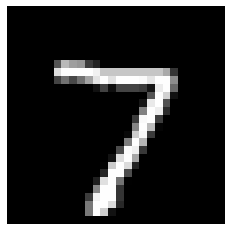

In [8]:
plt.axis('off')
plt.imshow(test_x[0],cmap='gray')
plt.show()

In [9]:
y_test[0].numpy()

7

In [30]:
np.argmax(model.predict(X_test)[0])

7